In [2]:
import numpy as np
import pandas as pd

### 최종 실습 프로젝트
- ecommerce_sales_data.csv 파일 활용

당신은 한 온라인 쇼핑몰의 데이터 분석가로 고용되었다. 쇼핑몰의 판매 데이터를 분석하여 고객의 구매 패턴을 파악하고, 중요한 인사이트를 도출하는 것이 이번 프로젝트의 목표다. 이를 통해 향후 마케팅 전략을 제시하고자 한다. ecommerce_sales_data.csv 파일을 통해 주어진 데이터는 고객의 주문 기록, 상품 정보, 판매 데이터 등을 포함하고 있다. 주어진 데이터를 분석하여 아래의 질문에 답하라.

- **데이터 설명**:
    - **OrderID**: 주문 ID
    - **Product**: 주문한 상품 이름
    - **Category**: 상품의 카테고리 (예: Electronics, Clothing 등)
    - **Quantity**: 주문 수량
    - **Price**: 상품의 가격
    - **CustomerID**: 고객 ID
    - **BirthDate**: 고객 생일
    - **OrderDate**: 주문 날짜
    - **Country**: 주문한 고객의 국가
    - **DiscountRate**: 할인율

1. **데이터 탐색 및 전처리**
    1. 데이터셋을 로드하고 상위 5개의 데이터를 출력하세요.
    2. 결측값이 있는 열이 있는지 확인하고, 결측값이 있는 경우 적절한 방법으로 처리하세요.
    3. 각 열의 데이터 타입을 확인하고, **OrderDate** 열을 datetime 형식으로 변환하세요.

In [14]:
df = pd.read_csv('./data/ecommerce_sales_data.csv')
df
# 1. 
df.head()
#  2. 
df.info()
df['DiscountRate'].fillna(df['DiscountRate'].mean(), inplace=True)
# df.info()
# 3. 
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
print(df['OrderDate'].head())

0   2024-06-10 17:18:00
1   2023-11-18 18:45:00
2   2023-10-15 11:19:00
3   2024-07-19 02:19:00
4   2024-01-20 20:34:00
Name: OrderDate, dtype: datetime64[ns]


2. **매출 분석**
    1. **매출액**(총 판매 금액)을 계산하는 새로운 열 `TotalRevenue`를 생성하세요.
        - 매출액 = `Quantity` * `Price`
    2. 월별 총 매출액을 집계하여 시각화하세요.
        - 힌트: `resample()`을 사용하여 월별로 데이터를 집계하세요.
    3. 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.
    4. 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가를 출력하세요.

In [16]:
# 1.
df['TotalRevenue'] = df['Quantity'] * df['Price']

# 생성된 열 확인
print(df[['Quantity', 'Price', 'TotalRevenue']].head())

   Quantity  Price  TotalRevenue
0         5  37000        185000
1         5  20000        100000
2         4   8000         32000
3         1   8000          8000
4         3  26000         78000


In [19]:
!pip install matplotlib

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.0 MB 4.2 MB/s eta 0:00:02
   ------------- -------------------------- 2.6/8.0 MB 6.9 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.0 MB 7.7 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.0 MB 8.1 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 7.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ----------------------- ---------------- 1.3/2.2 MB 6.1 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 6.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   --------------------------- ------------ 1.8/2.6 MB 9.1 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 8.4 MB/s eta 0:00:00


OrderDate
2023-10-31    392000
2023-11-30    995000
2023-12-31    920000
2024-01-31    905000
2024-02-29    565000
Freq: ME, Name: TotalRevenue, dtype: int64


C:\Users\조민훈\AppData\Local\Temp\ipykernel_12568\1432891532.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df.resample('M', on='OrderDate')['TotalRevenue'].sum()


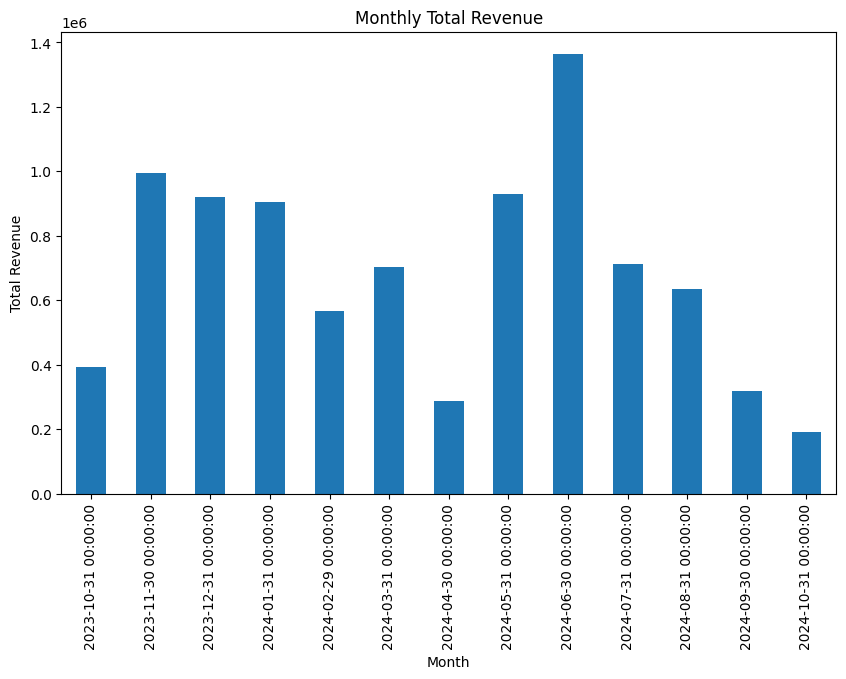

In [26]:
# 2. 2. 월별 총 매출액을 집계하여 시각화하세요.
        # - 힌트: `resample()`을 사용하여 월별로 데이터를 집계하세요.
import matplotlib.pyplot as plt
monthly_revenue = df.resample('M', on='OrderDate')['TotalRevenue'].sum()

print(monthly_revenue.head())

plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='bar')
plt.title('Monthly Total Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

In [ ]:
# 3. 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.

3. **고객 분석**
    1. 고객별로 총 매출액을 계산한 후, 상위 5명의 고객을 출력하세요.
    2. 주문 횟수가 가장 많은 상위 5명의 고객을 출력하세요.
    3. **연령대**에 따라 고객을 분류하고, 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하세요.
        - 힌트: 고객의 연령대는 따로 제공되지 않으므로, 가정 데이터를 추가해 임의로 분류할 수 있습니다.

4. **상품 분석**
    1. 가장 많이 판매된 상위 5개의 상품을 출력하세요.
    2. **카테고리별**로 가장 많이 판매된 상품을 찾아 출력하세요.
    3. **평균 구매 수량**이 가장 높은 상위 3개의 상품을 출력하세요.

5. **시간 분석**
    1. 주문 날짜별로 **주별** 매출액을 계산하고 시각화하세요.
    2. 특정 기간(예: 2024년 1월 ~ 2024년 6월) 동안의 매출 추이를 분석하고 시각화하세요.
    3. 특정 국가에서 가장 많이 주문한 시간대를 분석하고, 이를 시각화하여 인사이트를 도출하세요.

6. **추가 분석**
    1. 고객의 **재구매율**을 분석하세요.
        - 재구매율 = 한 고객이 여러 번 주문한 비율
    2. 상품 카테고리별 **할인**을 적용한 판매 데이터를 사용하여 할인율이 높은 카테고리의 매출액을 분석하세요.